In [1]:
# Load Libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# One-Hot Encoding

Some steps may be needed before applying custering algorithms

## Load Data

In [2]:
dat = pd.read_csv('../data/userbase.csv', sep = ";")
dat

,user,booking_date,origin_airport,price,sales channel,company,user_country,index
0,user5,2018-11-01,MAD,58.200001,online,I2,NaN,1
1,user7,2018-11-01,DUB,147.500000,online,I2,NaN,2
2,user4,2018-11-02,TFS,24.049999,online,I2,NaN,3
3,user8,2018-10-29,MAD,59.709999,online,I2,NaN,4
4,user7,2018-11-01,LPA,37.299999,call center,I2,NaN,5
...,...,...,...,...,...,...,...,...
995,user2,2018-11-01,JMK,99.849998,online,I2,NaN,996
996,user10,2018-11-01,SVQ,34.610001,online,I2,NaN,997
997,user4,2018-10-30,MAD,49.880001,online,I2,NaN,998
998,user10,2018-11-02,CDG,152.960007,online,I2,NaN,999


## One-hot Encoding

Most machine learning models (decision trees are an exception) does not support categorical variables as input. Therefore, these variables should be transformed into numerical variables.

The standard approach is to use one-hot encoding or dummy variables creation.

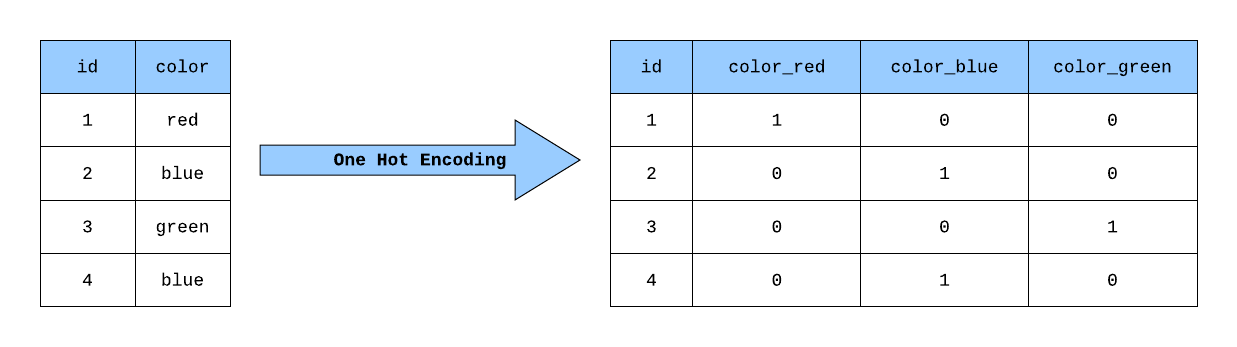

Remember that label encoding is usually not a good option, as you are assuming a specific order and distances in your categories.

In [3]:
from sklearn.preprocessing import OneHotEncoder

In [4]:
dat.dtypes

user               object
booking_date       object
origin_airport     object
price             float64
sales channel      object
company            object
user_country       object
index               int64
dtype: object

In [5]:
categorical_vars = set(dat.columns[dat.dtypes == object])
numerical_vars = set(dat.columns) - categorical_vars
categorical_vars = list(categorical_vars)
numerical_vars = list(numerical_vars)
print(categorical_vars)
print(numerical_vars)

['booking_date', 'user', 'sales channel', 'user_country', 'origin_airport', 'company']
['price', 'index']


In [6]:
# 3 defining the model
ohe = OneHotEncoder(sparse_output = False)

# 4) Training model
ohe.fit(dat[categorical_vars])

# 5) Predicting
dat_ohe = pd.DataFrame(ohe.fit_transform(dat[categorical_vars]))

# Optional
dat_ohe.columns = ohe.get_feature_names_out()

In [7]:
dat[categorical_vars].head()

,booking_date,user,sales channel,user_country,origin_airport,company
0,2018-11-01,user5,online,NaN,MAD,I2
1,2018-11-01,user7,online,NaN,DUB,I2
2,2018-11-02,user4,online,NaN,TFS,I2
3,2018-10-29,user8,online,NaN,MAD,I2
4,2018-11-01,user7,call center,NaN,LPA,I2


In [8]:
dat_ohe.head()

,booking_date_2018-10-29,booking_date_2018-10-30,booking_date_2018-10-31,booking_date_2018-11-01,booking_date_2018-11-02,booking_date_2018-11-03,user_user1,user_user10,user_user2,user_user3,...,origin_airport_SPC,origin_airport_STR,origin_airport_SVQ,origin_airport_TFN,origin_airport_TFS,origin_airport_TLS,origin_airport_TXL,origin_airport_VGO,origin_airport_XRY,company_I2
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


If you want to drop the redundant column you must specify the drop argument

In [9]:
ohe = OneHotEncoder(drop = 'first', sparse_output = False)

Recover numerical variables.

In [10]:
dat_new = pd.concat((dat[numerical_vars], dat_ohe), axis=1)

In [11]:
dat_new

,price,index,booking_date_2018-10-29,booking_date_2018-10-30,booking_date_2018-10-31,booking_date_2018-11-01,booking_date_2018-11-02,booking_date_2018-11-03,user_user1,user_user10,...,origin_airport_SPC,origin_airport_STR,origin_airport_SVQ,origin_airport_TFN,origin_airport_TFS,origin_airport_TLS,origin_airport_TXL,origin_airport_VGO,origin_airport_XRY,company_I2
0,58.200001,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,147.500000,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,24.049999,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,59.709999,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,37.299999,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,99.849998,996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
996,34.610001,997,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
997,49.880001,998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
998,152.960007,999,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
dat_new.dtypes

price                      float64
index                        int64
booking_date_2018-10-29    float64
booking_date_2018-10-30    float64
booking_date_2018-10-31    float64
                            ...   
origin_airport_TLS         float64
origin_airport_TXL         float64
origin_airport_VGO         float64
origin_airport_XRY         float64
company_I2                 float64
Length: 76, dtype: object

If you want to use LabelEncoder (you shouldn't ;p)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
# 3 defining the model
ohe = LabelEncoder()

# Predicting
new_column = ohe.fit_transform(dat['sales channel'])

In [15]:
new_column

array([1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 0, 1, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1,
       2, 1, 2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2,

In [16]:
dat_new = dat.copy()
dat_new['sales channel'] = new_column;
dat_new

,user,booking_date,origin_airport,price,sales channel,company,user_country,index
0,user5,2018-11-01,MAD,58.200001,1,I2,NaN,1
1,user7,2018-11-01,DUB,147.500000,1,I2,NaN,2
2,user4,2018-11-02,TFS,24.049999,1,I2,NaN,3
3,user8,2018-10-29,MAD,59.709999,1,I2,NaN,4
4,user7,2018-11-01,LPA,37.299999,0,I2,NaN,5
...,...,...,...,...,...,...,...,...
995,user2,2018-11-01,JMK,99.849998,1,I2,NaN,996
996,user10,2018-11-01,SVQ,34.610001,1,I2,NaN,997
997,user4,2018-10-30,MAD,49.880001,1,I2,NaN,998
998,user10,2018-11-02,CDG,152.960007,1,I2,NaN,999


In [17]:
dat_new.dtypes

user               object
booking_date       object
origin_airport     object
price             float64
sales channel       int32
company            object
user_country       object
index               int64
dtype: object

## Define Custom Function

In [18]:
def one_hot(X, categorical_variables):
    # 3 defining the model
    ohe = OneHotEncoder(sparse_output = False)

    # Training model
    ohe.fit([categorical_variables])

    # Predicting
    X_ohe = pd.DataFrame(ohe.fit_transform(X[categorical_variables]))

    # Optional
    X_ohe.columns = pd.DataFrame(ohe.get_feature_names_out())

    # Final value
    X.drop(categorical_variables, axis = 1)
    X = pd.concat([X, X_ohe], axis = 1)

    return X

In [19]:
dat_new = one_hot(dat, categorical_vars)
dat_new

,user,booking_date,origin_airport,price,sales channel,company,user_country,index,"(booking_date_2018-10-29,)","(booking_date_2018-10-30,)",...,"(origin_airport_SPC,)","(origin_airport_STR,)","(origin_airport_SVQ,)","(origin_airport_TFN,)","(origin_airport_TFS,)","(origin_airport_TLS,)","(origin_airport_TXL,)","(origin_airport_VGO,)","(origin_airport_XRY,)","(company_I2,)"
0,user5,2018-11-01,MAD,58.200001,online,I2,NaN,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,user7,2018-11-01,DUB,147.500000,online,I2,NaN,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,user4,2018-11-02,TFS,24.049999,online,I2,NaN,3,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,user8,2018-10-29,MAD,59.709999,online,I2,NaN,4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,user7,2018-11-01,LPA,37.299999,call center,I2,NaN,5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,user2,2018-11-01,JMK,99.849998,online,I2,NaN,996,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
996,user10,2018-11-01,SVQ,34.610001,online,I2,NaN,997,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
997,user4,2018-10-30,MAD,49.880001,online,I2,NaN,998,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
998,user10,2018-11-02,CDG,152.960007,online,I2,NaN,999,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Question:** What happens if you hundreds of categorical columns, each one with thousand of categories?